In [1]:
# Distribution classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sys
import os
import math
import importlib

# Add the current directory to path to import eda.py
sys.path.append(os.path.dirname(os.getcwd()))


# Set plotting style
plt.style.use('default')
sns.set_palette("Set2")

In [2]:
from data.dataloader import DataLoader
from config.config import CONFIG
#importlib.reload(DataLoader)

loader = DataLoader(CONFIG.data)
df = loader.load_data()


from data.preprocessing import DataPreprocessor
preprocessor = DataPreprocessor(CONFIG.data)
df = preprocessor.preprocess(df)

Target transformation applied: {1: 700, 0: 300}


In [3]:
# define the features
ordinal_features = CONFIG.data.ordinal_features
nominal_features = CONFIG.data.nominal_features
num_features = CONFIG.data.num_features

In [4]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status_sex,other_debtors,...,housing,existing_credits,job,people_liable,telephone,foreign_worker,credit_risk,credit_per_duration,credit_per_age,credit_per_existing
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A152,2,A173,1,A192,A201,1,167.000000,17.191176,389.666667
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A152,1,A173,1,A191,A201,0,121.448980,258.739130,2975.500000
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A152,1,A172,2,A191,A201,1,161.230769,41.920000,1048.000000
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A153,1,A173,2,A191,A201,1,183.302326,171.347826,3941.000000
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A153,2,A173,2,A191,A201,0,194.800000,90.185185,1623.333333


In [5]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   checking_status      1000 non-null   object 
 1   duration             1000 non-null   int64  
 2   credit_history       1000 non-null   object 
 3   purpose              1000 non-null   object 
 4   credit_amount        1000 non-null   int64  
 5   savings              1000 non-null   object 
 6   employment           1000 non-null   object 
 7   installment_rate     1000 non-null   int64  
 8   personal_status_sex  1000 non-null   object 
 9   other_debtors        1000 non-null   object 
 10  residence_since      1000 non-null   int64  
 11  property             1000 non-null   object 
 12  age                  1000 non-null   int64  
 13  other_installment    1000 non-null   object 
 14  housing              1000 non-null   object 
 15  existing_credits     1000 non-null   in

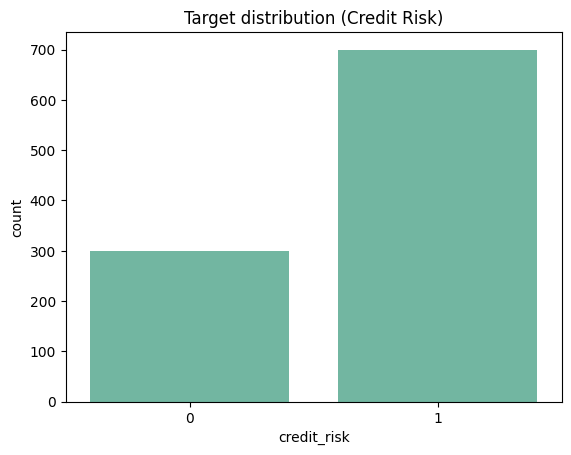

In [6]:
sns.countplot(x="credit_risk", data=df)
plt.title("Target distribution (Credit Risk)")
plt.show()

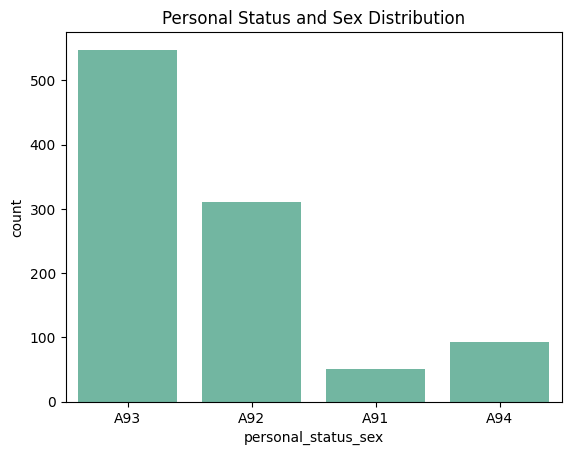

In [7]:
sns.countplot(x="personal_status_sex", data=df)
plt.title("Personal Status and Sex Distribution")
plt.show()

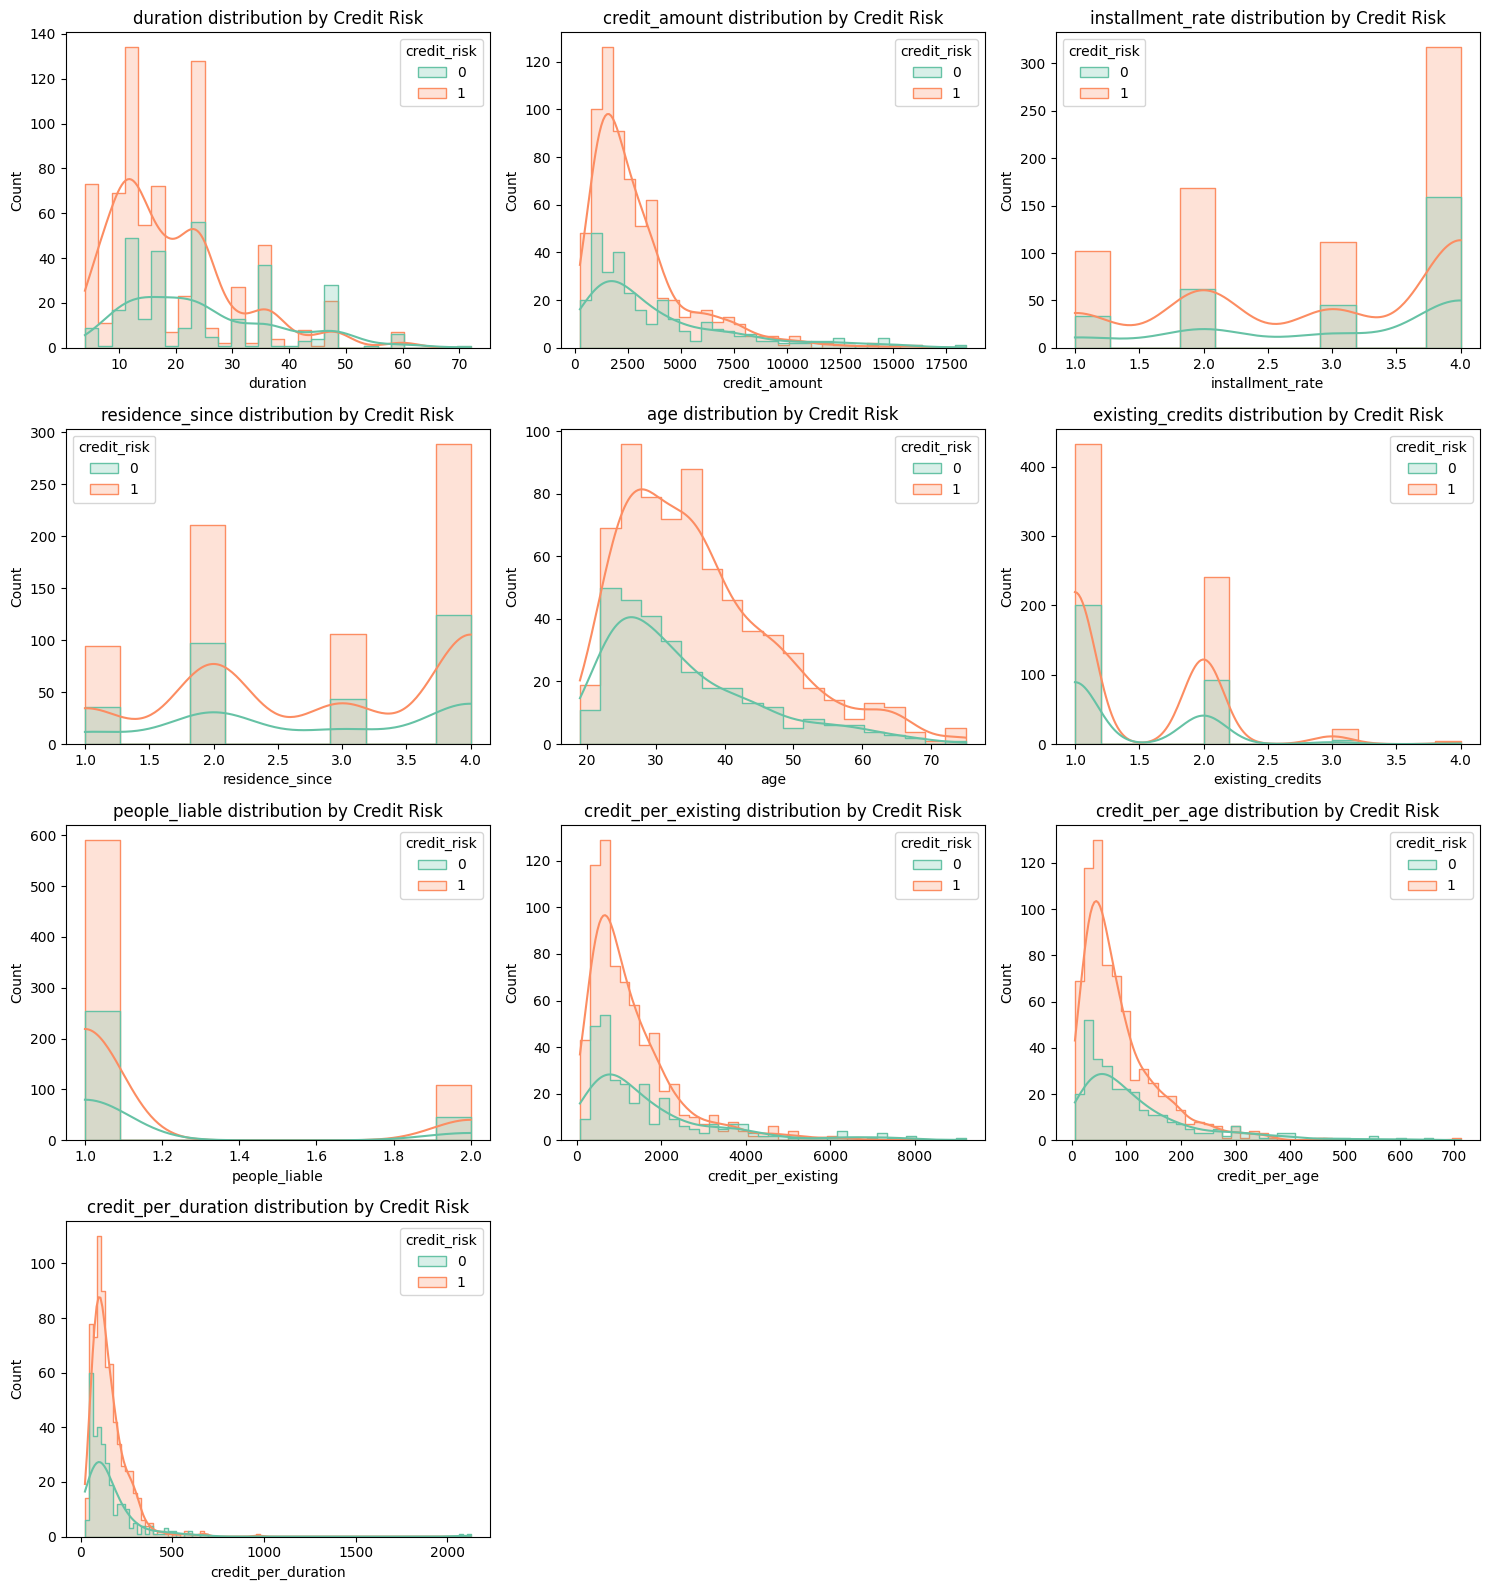

In [8]:
cols = 3
rows = math.ceil(len(num_features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten in case of single row

for i, col in enumerate(num_features):
    sns.histplot(data=df, x=col, hue="credit_risk", kde=True, element="step", ax=axes[i])
    axes[i].set_title(f"{col} distribution by Credit Risk")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


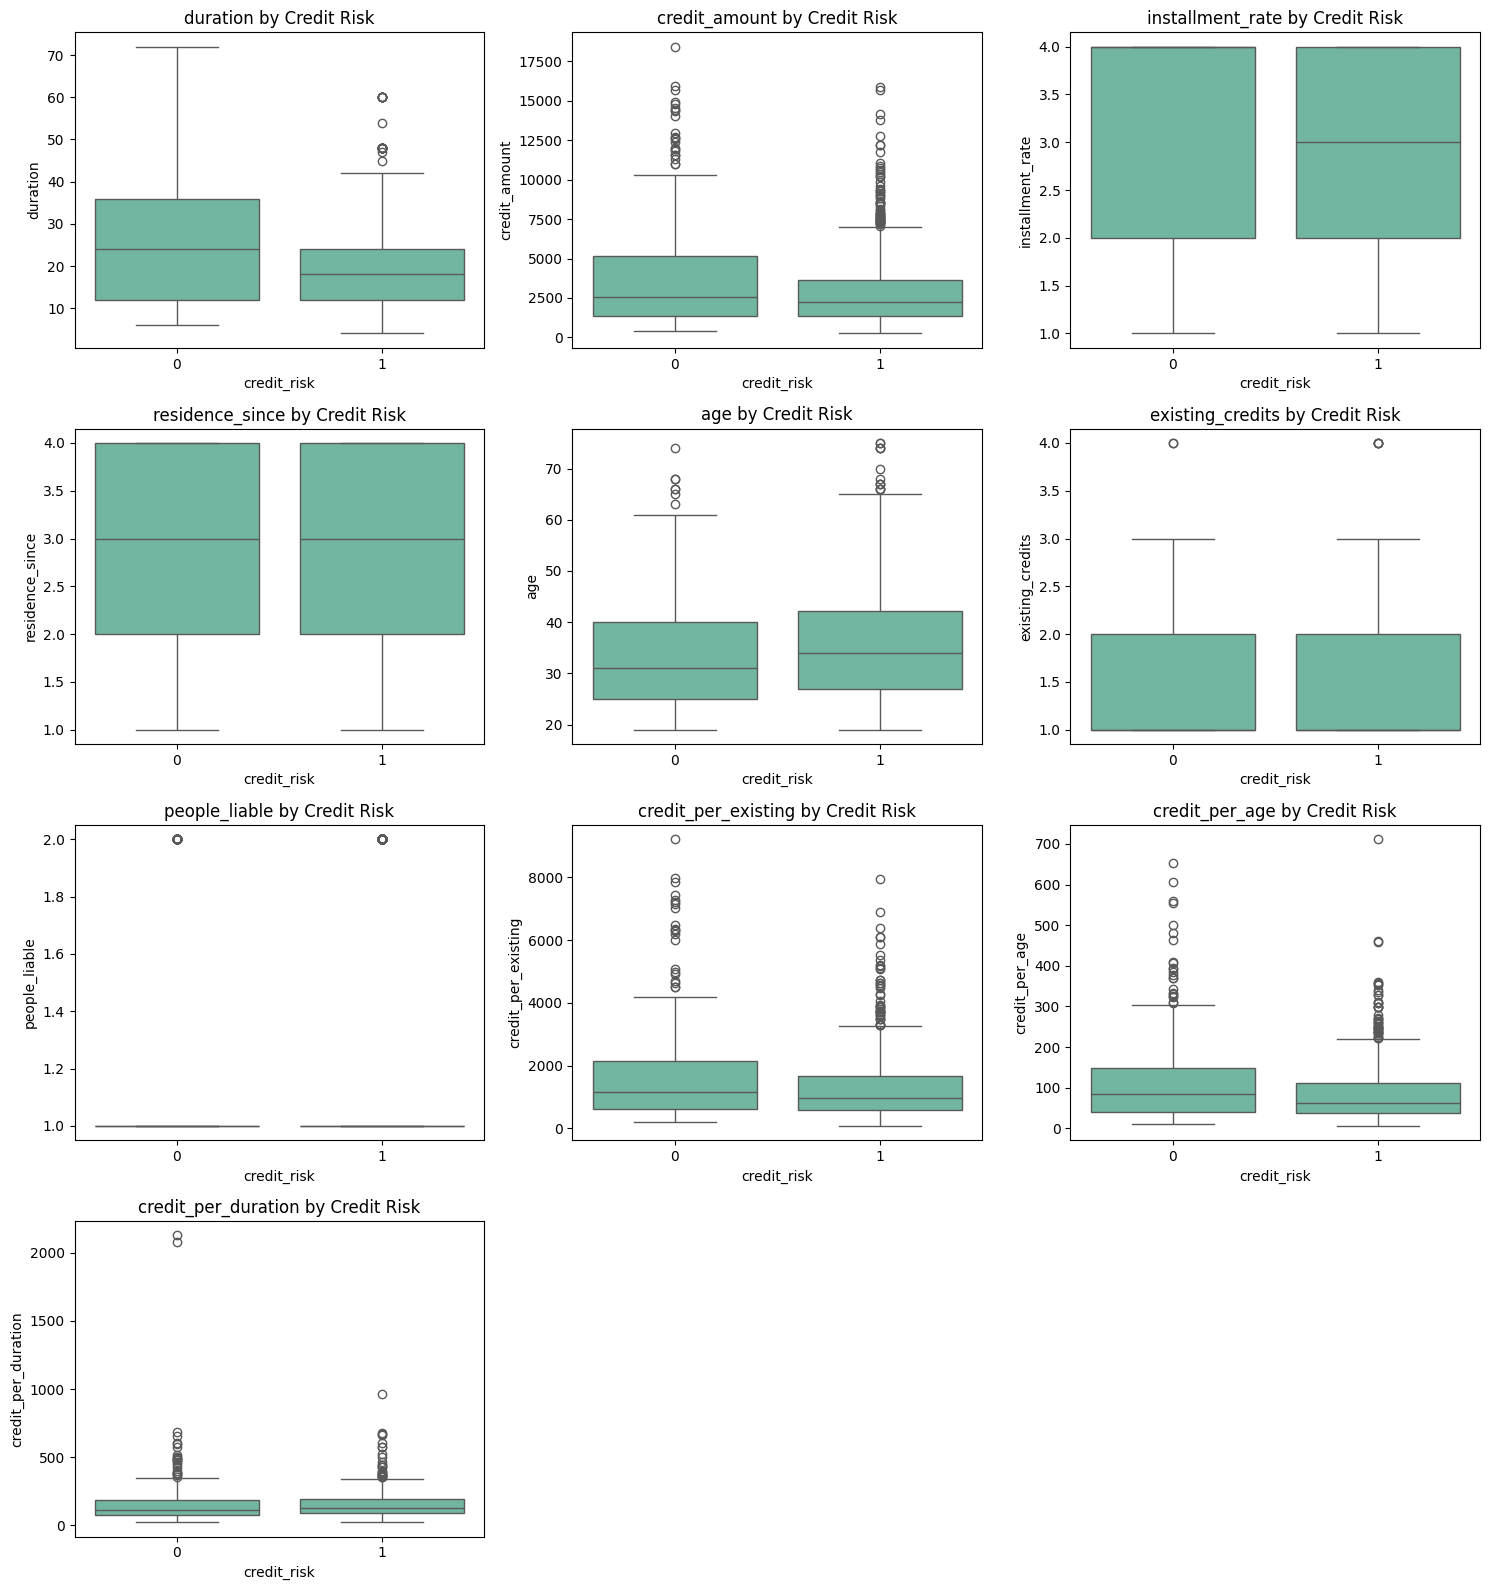

In [9]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x="credit_risk", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} by Credit Risk")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

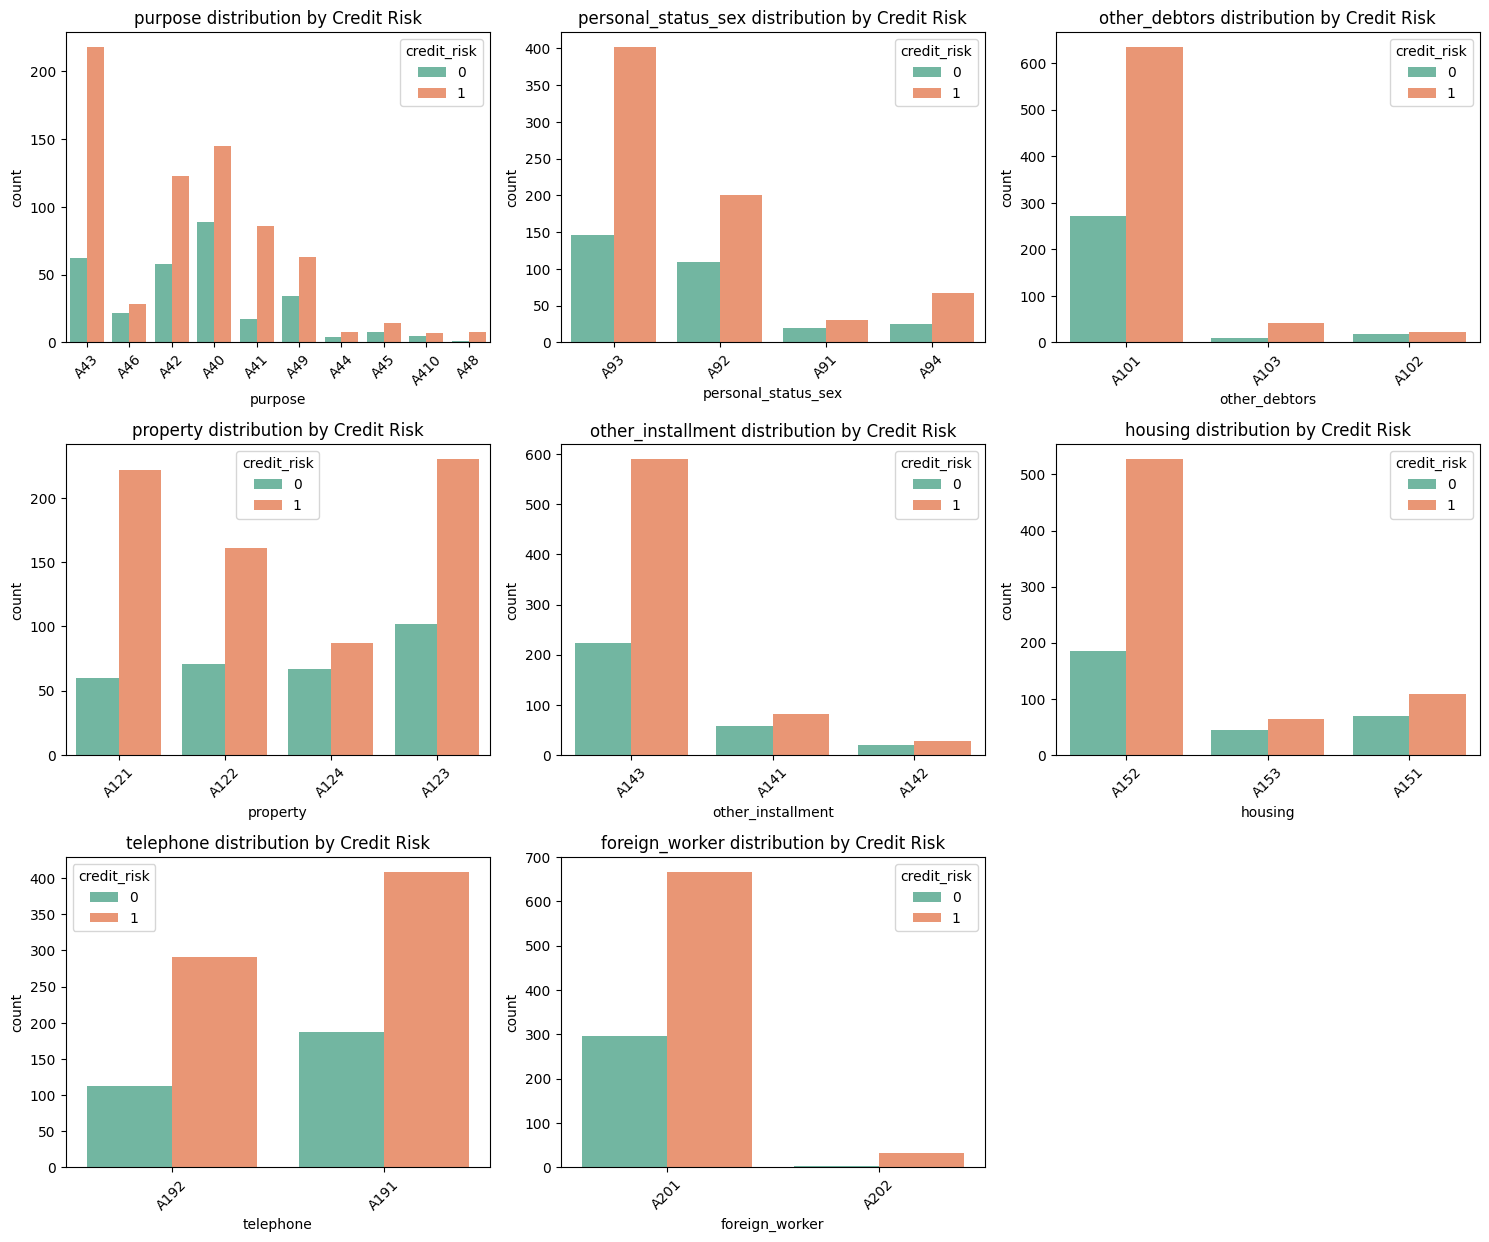

In [10]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(nominal_features):
    sns.countplot(x=col, hue="credit_risk", data=df, ax=axes[i])
    axes[i].set_title(f"{col} distribution by Credit Risk")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

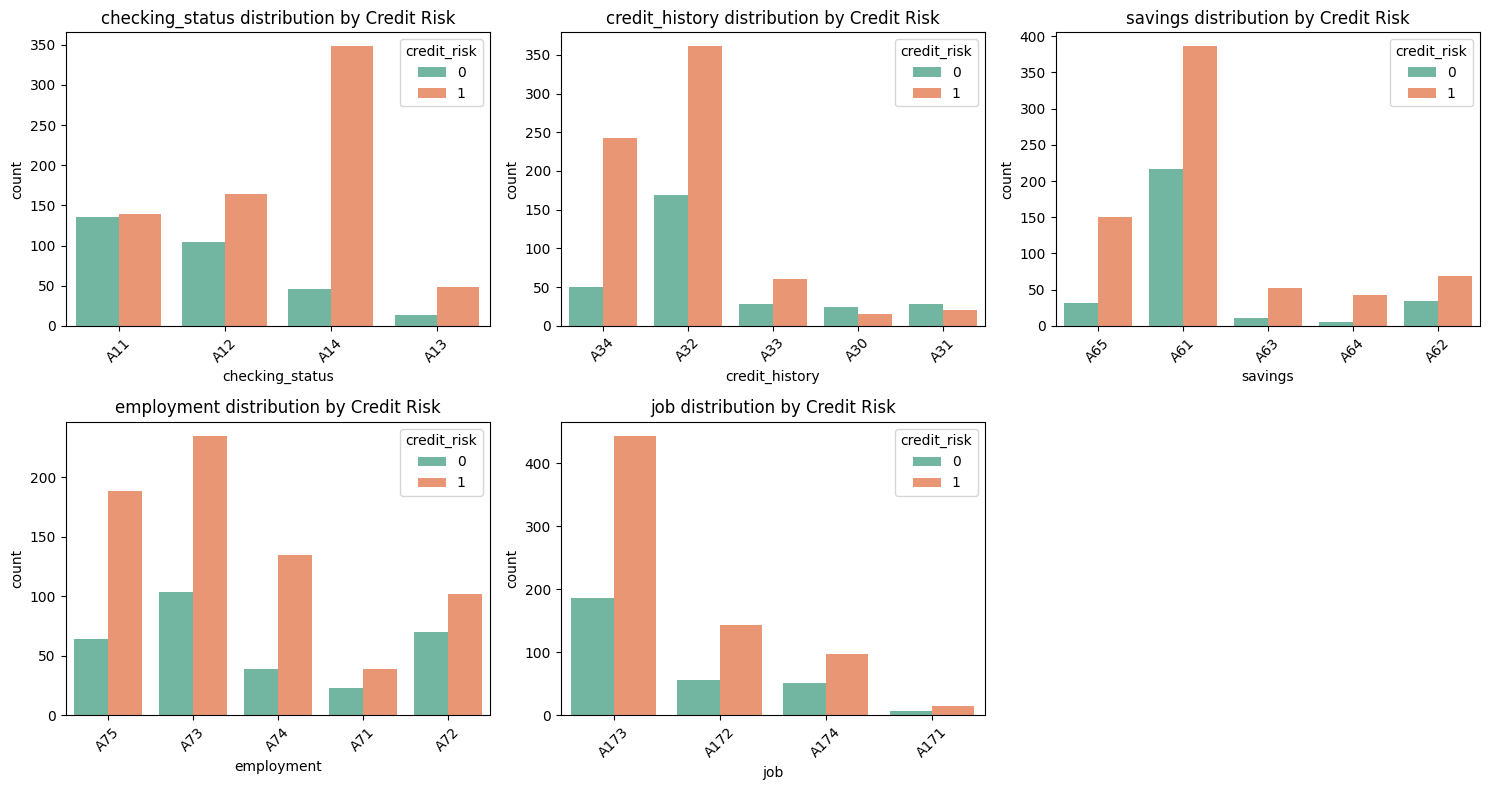

In [11]:
rows = math.ceil(len(ordinal_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(ordinal_features):
    sns.countplot(x=col, hue="credit_risk", data=df, ax=axes[i])
    axes[i].set_title(f"{col} distribution by Credit Risk")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

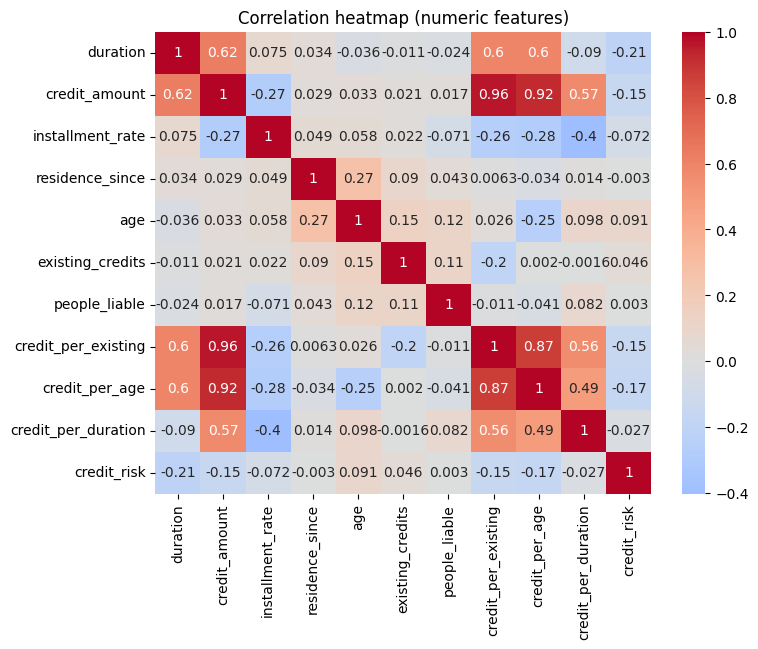

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_features + ["credit_risk"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation heatmap (numeric features)")
plt.show()